In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# PCR testing strategy in a COVID pandemic

We have expanded a SEIR model where the population is being tested, and when an infectious person is detected, it gets isolated. The equations of the expandend SEIR model are:

\begin{equation}
    \begin{aligned}
        \frac{dS}{dt}   &= \frac{-\beta SI}{N}-\frac{\beta SI_T}{N}-\epsilon S\\
        \frac{dS_T}{dt} &= \frac{-\beta S_TI}{N}-\frac{\beta S_TI_T}{N}+\epsilon S\\
        \frac{dE}{dt}   &= \frac{\beta SI}{N}+\frac{\beta SI_T}{N} + \frac{\beta S_TI}{N}+\frac{\beta S_TI_T}{N} - \sigma E - \epsilon E\\
        \frac{dE_T}{dt}  &= -\sigma E_T + \epsilon E\\
        \frac{dI}{dt}    &= \sigma E + \sigma E_T - \gamma I - \epsilon I\\
        \frac{dI_T}{dt}  &= - \theta I_T - \gamma I_T + \epsilon I\\
        \frac{dI_I}{dt}  &= \theta I_T - \gamma I_I\\
        \frac{dR}{dt}    &= \gamma (I+I_T+I_I) - \epsilon R\\
        \frac{dR}{dt}    &= \epsilon R\\
    \end{aligned}
\end{equation}

where $\epsilon$ is the testing rate and $\theta$ the isolation rate. Now, if we consider that tested Infected, $I_T$ are immediately isolated, the above system reduce to:

\begin{equation}
    \begin{aligned}
        \frac{dS}{dt}   &= \frac{-\beta SI}{N}-\epsilon S\\
        \frac{dS_T}{dt} &= \frac{-\beta S_TI}{N}+\epsilon S\\
        \frac{dE}{dt}   &= \frac{\beta SI}{N} + \frac{\beta S_TI}{N}-\sigma E-\epsilon E\\
        \frac{dE_T}{dt}  &= -\sigma E_T + \epsilon E\\
        \frac{dI}{dt}    &= \sigma E + \sigma E_T - \gamma I - \epsilon I\\
        \frac{dI_T}{dt}  &= - \gamma I_T + \epsilon I\\
        \frac{dR}{dt}    &= \gamma (I+I_T)-\epsilon R\\
        \frac{dR_T}{dt}    &= \epsilon R\\
    \end{aligned}
\end{equation}

here, by simplicity, because we are reducing one parameter, we implement the second group of equations. In this way the system is composed by 4 parameters: $\beta$, $\sigma$, $\gamma$ wich are biological parameters, and $\epsilon$ which is the testing parameter.

If external flux is entering the system, we should add $fI$ to the infected state, where $f$ is the proportion of new infected regarding actual infected.


## Model implementation

In [8]:
#SEIR testing strategy model function
def model_SEIR_testing(y, t):
    S0   = y[0]
    S0_T = y[1]
    E0   = y[2]
    E0_T = y[3]
    I0   = y[4]
    I0_T = y[5]
    R0   = y[6]
    R0_T = y[7]
    
    dSdt   = -beta*S0*I0/N - epsilon*S0
    dS_Tdt = -beta*S0_T*I0/N + epsilon*S0
    dEdt   = beta*S0*I0/N + beta*S0_T*I0/N - sigma*E0 - epsilon*E0
    dE_Tdt = -sigma*E0_T + epsilon*E0
    dIdt   = sigma*E0 + sigma*E0_T - gamma*I0 - epsilon*I0
    dI_Tdt = -gamma*I0_T + epsilon*I0
    dRdt   = gamma*(I0+I0_T) - epsilon*R0
    dR_Tdt = epsilon*R0
    
    return [dSdt, dS_Tdt, dEdt, dE_Tdt, dIdt, dI_Tdt, dRdt, dR_Tdt]

## Initial condition and running the model

In [23]:
# initial parameters
beta    = 0.2
sigma   = 0.2 # 1/5 
gamma   = 0.1 # 1/14
epsilon = 0.2#2
 
# initial states conditions
Si   = 1000000
Si_T = 0
Ei   = 0
Ei_T = 0
Ii   = 100
Ii_T = 0
Ri   = 0
Ri_T = 0

N = Si + Si_T + Ei + Ei_T + Ii + Ii_T + Ri + Ri_T
t  = np.linspace(0, 400., 4000)                  # time grid, (from, to, number_of_step)
y0 = [Si, Si_T, Ei, Ei_T, Ii, Ii_T, Ri, Ri_T]   # initial conditions vector
    
# solve the ODEs
soln = odeint(model_SEIR_testing, y0, t)        # (model, initial_conditions, time_series)

# reshape the output of the solver to plot the states
S   = soln[:, 0]
S_T = soln[:, 1]
E   = soln[:, 2]
E_T = soln[:, 3]
I   = soln[:, 4]
I_T = soln[:, 5]
R   = soln[:, 6]
R_T = soln[:, 7]

In [24]:
# initial parameters
beta    = 0.4
sigma   = 0.2 # 1/5 
gamma   = 0.071 # 1/14
epsilon = 0.2
 
# initial states conditions
Si   = 10000
Si_T = 0
Ei   = 0
Ei_T = 0
Ii   = 1
Ii_T = 0
Ri   = 0
Ri_T = 0

N = Si + Si_T + Ei + Ei_T + Ii + Ii_T + Ri + Ri_T
t  = np.linspace(0, 400., 4000)                  # time grid, (from, to, number_of_step)
y0 = [Si, Si_T, Ei, Ei_T, Ii, Ii_T, Ri, Ri_T]   # initial conditions vector
    
# solve the ODEs
soln = odeint(model_SEIR_testing, y0, t)        # (model, initial_conditions, time_series)

# reshape the output of the solver to plot the states
S   = soln[:, 0]
S_T = soln[:, 1]
E   = soln[:, 2]
E_T = soln[:, 3]
I   = soln[:, 4]
I_T = soln[:, 5]
R   = soln[:, 6]
R_T = soln[:, 7]

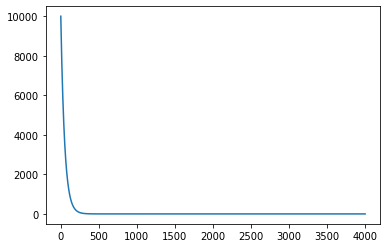

In [25]:
plt.plot(S)
plt.show()

In [26]:
plt.plot(t, S, label='Susceptible')
plt.plot(t, E, label='Exposed')
plt.plot(t, I, label='Infected')
plt.plot(t, R, label='Removed')
plt.title("states")
plt.legend()
plt.show()

plt.plot(t, S_T, label='Susceptible tested')
plt.plot(t, E_T, labilon = 0.0el='Exposed  tested')
plt.plot(t, I_T, label='Infected tested')
plt.plot(t, R_T, label='Removed tested')
plt.title("tested states")
plt.legend()
plt.show()

SyntaxError: invalid syntax (<ipython-input-26-6a2fd99e9dc0>, line 10)

In [27]:
epsilon

0.2

In [28]:
R[-1]

0.05526265376997764

In [29]:
R[-1]+R_T[-1]

5670.175313936595

In [30]:
a = S+S_T+E+E_T+I+I_T+R+R_T